In [2]:
import pandas as pd
from textblob import TextBlob
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [3]:
df = pd.read_csv('programming_task_dataset.csv', sep=',')
train_df = pd.read_csv('training_data.csv', sep=',')

In [4]:
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','', text) #remove mentions
    text=re.sub(r'#', '', text) #remove hashtag symbol
    text=re.sub(r'RT[\s]+', '', text) #remove Retweet symbol
    text=re.sub(r'https?:\/\/\S+', '', text) #remove hyperlinks 
    return text

df['text'] = df['text'].apply(str).apply(cleanTxt)

In [14]:
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# print(df.head(5))

In [5]:
train_df['text'] = train_df['text'].apply(str).apply(cleanTxt)

<function matplotlib.pyplot.show(close=None, block=None)>

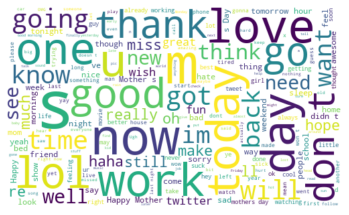

In [6]:
allwords=' '.join(train_df['text'])
wordcloud=WordCloud(width=500, height=300,random_state=21,max_font_size=100,
                    background_color = 'white').generate(allwords)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show

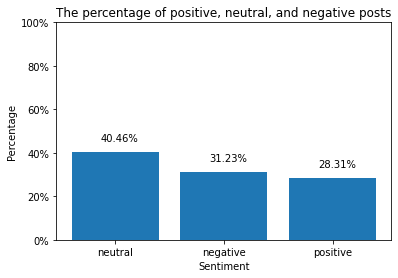

In [7]:
labels = train_df['sentiment'].drop_duplicates().values
stat = train_df['sentiment'].value_counts().map(lambda x: x / len(train_df)).values

fig, ax = plt.subplots()
plt.ylim(0,1)
rect = ax.bar(labels, stat)
ax.set_title('The percentage of positive, neutral, and negative posts')
ax.set_ylabel('Percentage')
ax.set_xlabel('Sentiment')

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
[ax.text(i - .13, v + .05, "{:.2%}".format(v)) for i, v in enumerate(stat)]

plt.show()